# Chapter: 6
## Section: Explanations in SHAP

In [1]:
!pip install shap

In [2]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import roc_auc_score
import numpy as np

# loading UCI adult income dataset
# classification task to predict if people made over $50k in the 90s or not
X,y = shap.datasets.adult()
# split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=10)
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train, y_train)
# generating predictions for the test set
y_pred = xgb_model.predict(X_test)
# identifying misclasssified datapoints in the test set
misclassified_index = np.where(y_test != y_pred)[0]
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])))
#
print("First 5 misclassidied test set datapoints: {}".format(misclassified_index[0:5]))

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


ROC-AUC of predictions: 0.9248074491175615
First 5 misclassidied test set datapoints: [ 3 12 22 24 27]


In [3]:
# generate the Tree explainer
explainer = shap.TreeExplainer(xgb_model)
# extract SHAP values from the explainer object
shap_values = explainer.shap_values(X_test)

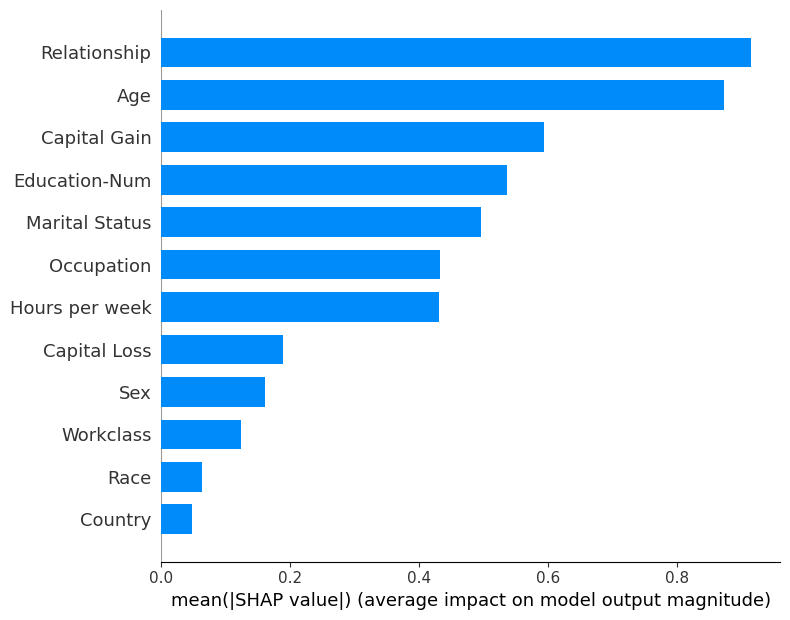

In [4]:
# create a SHAP beeswarm plot (i.e. SHAP summary plot)
shap.summary_plot(shap_values, X_test,plot_type="bar")

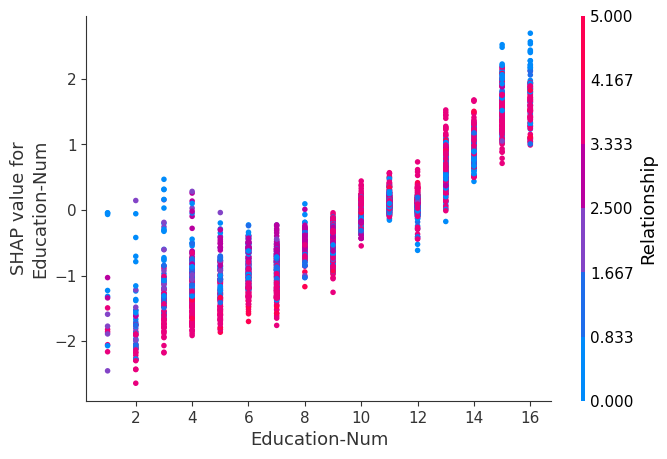

In [5]:
# If interaction_index of “auto” is chosen then
# the strongest interaction is used to color the dots.
shap.dependence_plot("Education-Num", shap_values, X_test)

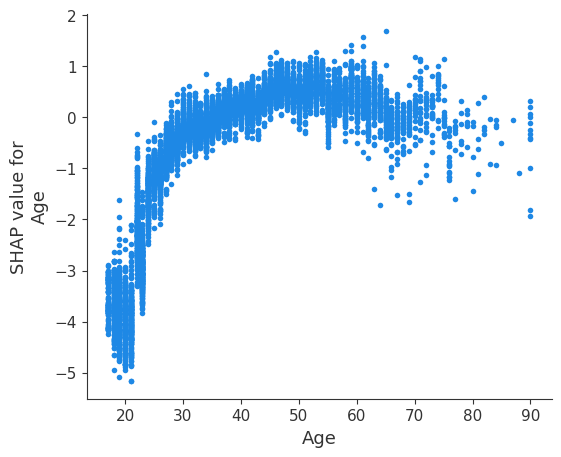

In [6]:
# generate dependence plot for "Age" feature
shap.dependence_plot("Age", shap_values, X_test, interaction_index=None)

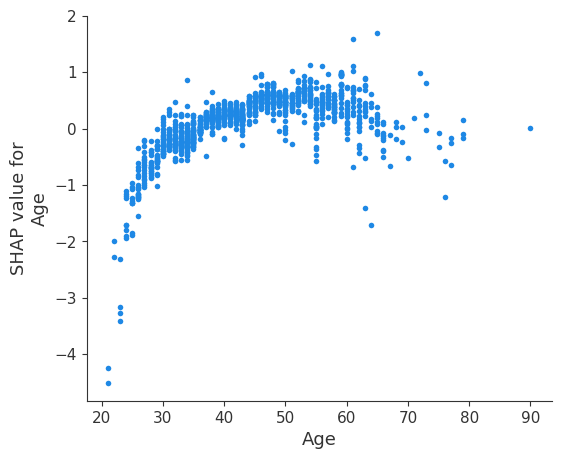

In [7]:
# generate dependence plot for "Age" feature
shap.dependence_plot("Age", shap_values[misclassified_index], X_test.iloc[misclassified_index,:], interaction_index=None)

actual label of sample 12: False
prediction for sample 12: 1


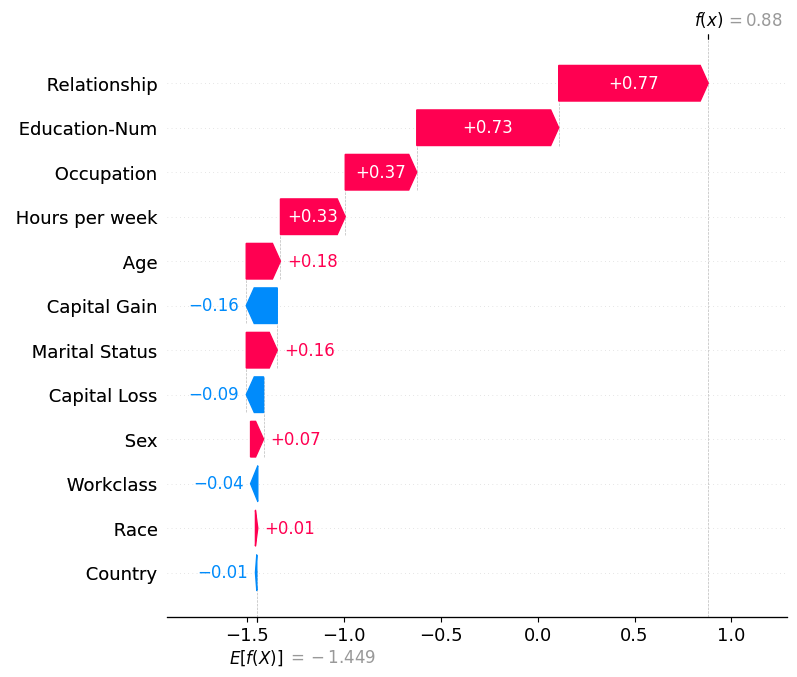

actual label of sample 24: True
prediction for sample 24: 0


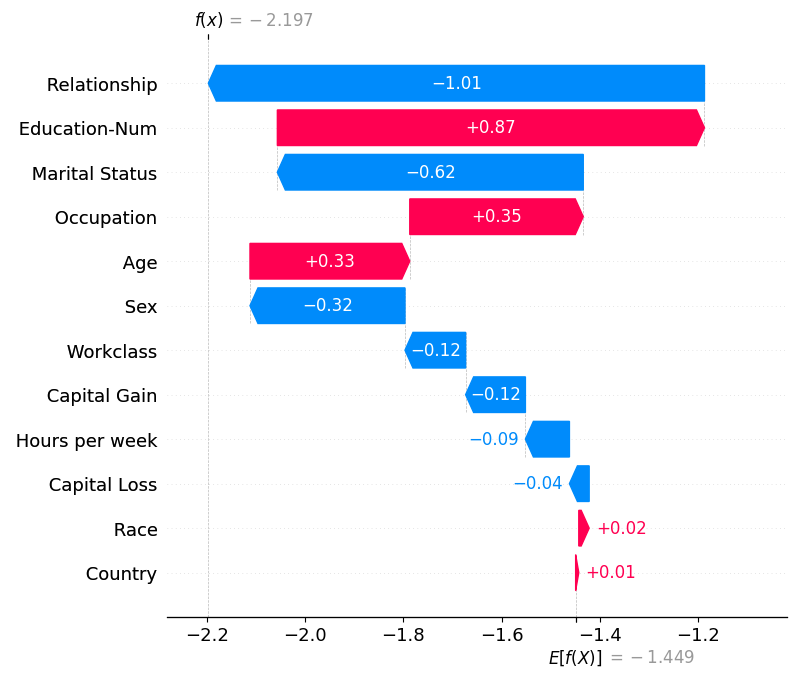

In [8]:
# extracting expected values
expected_value = explainer.expected_value
# generate waterfall plot for observation 12
print('actual label of sample 12: {}'.format(y_test[12]))
print('prediction for sample 12: {}'.format(y_pred[12]))
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[12],
                                       features=X_test.iloc[12,:],
                                       feature_names=X.columns,
                                       max_display=15, show=True)

# generate waterfall plot for observation 24
print('actual label of sample 24: {}'.format(y_test[24]))
print('prediction for sample 24: {}'.format(y_pred[24]))
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[24],
                                       features=X_test.iloc[24,:],
                                       feature_names=X.columns,
                                       max_display=15, show=True)